# Data Analysis

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [2]:
def get_data():
    return pd.read_csv("data/user_behavior_dataset.csv")

In [3]:
def pre_process_data(df, one_hot_encode = False, ordinal_encode = False):
    target = "Life expectancy"    

    # Use sklearn Imputers to fill in the categorical and numerical columns
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])
    
    if one_hot_encode:
        df = pd.get_dummies(df, dtype=int)
    elif ordinal_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])
    return df

In [4]:
def feature_selection(df):
    df = df.drop(["App Usage Time (min/day)", "Data Usage (MB/day)", "Number of Apps Installed", "User Behavior Class", "Gender_Female", "Operating System_Android", "Operating System_iOS", "Battery Drain (mAh/day)"], axis = 1)
    return df

In [5]:
target = "Screen On Time (hours/day)"
def get_test_train(df, test_size = 0.2, random_state = False):    
    X = df.drop(target, axis=1)
    y = df[target]
    if random_state:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    return X_train, X_test, y_train, y_test

In [6]:
df = pre_process_data(get_data(), one_hot_encode = True)
#df = feature_selection(df)
df

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1.0,393.0,6.4,1872.0,67.0,1122.0,40.0,4.0,1,0,0,0,0,1,0,0,1
1,2.0,268.0,4.7,1331.0,42.0,944.0,47.0,3.0,0,1,0,0,0,1,0,1,0
2,3.0,154.0,4.0,761.0,32.0,322.0,42.0,2.0,0,0,0,1,0,1,0,0,1
3,4.0,239.0,4.8,1676.0,56.0,871.0,20.0,3.0,1,0,0,0,0,1,0,0,1
4,5.0,187.0,4.3,1367.0,58.0,988.0,31.0,3.0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696.0,92.0,3.9,1082.0,26.0,381.0,22.0,2.0,0,0,0,0,1,0,1,0,1
696,697.0,316.0,6.8,1965.0,68.0,1201.0,59.0,4.0,0,0,0,1,0,1,0,0,1
697,698.0,99.0,3.1,942.0,22.0,457.0,50.0,2.0,1,0,0,0,0,1,0,1,0
698,699.0,62.0,1.7,431.0,13.0,224.0,44.0,1.0,0,0,1,0,0,1,0,0,1


In [7]:
X_train, X_test, y_train, y_test = get_test_train(df)
lreg = LinearRegression()
model = lreg.fit(X_train, y_train)

In [8]:
pred = lreg.predict(X_test)
print(f"Train R-squared  = {model.score(X_train, y_train):.3}")
print(f"Test  R-squared  = {model.score(X_test, y_test):.3}")

Train R-squared  = 0.941
Test  R-squared  = 0.934


A regular linear regression seems really good for this data, yielding about 94-95% accuracy.

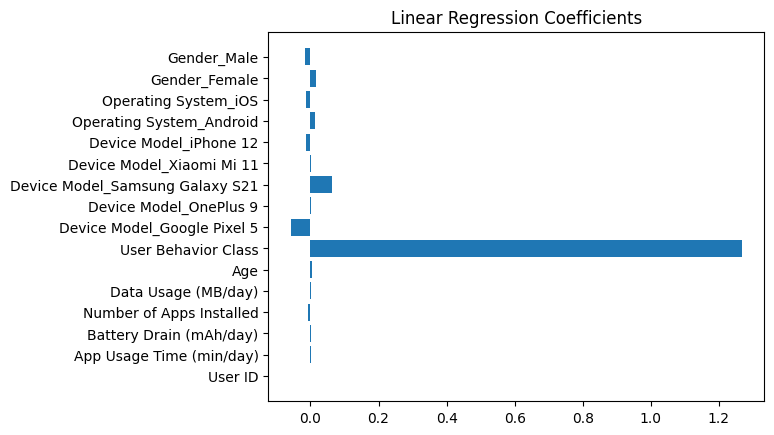

In [9]:
plt.barh(y = df.drop(target,axis=1).columns, width=model.coef_);
plt.title("Linear Regression Coefficients");

Something seems off, only User Behavior class has any strong correlation with screen time.

In [10]:
df_heat = df.drop(target, axis=1)
corr_matrix = df_heat.corr()

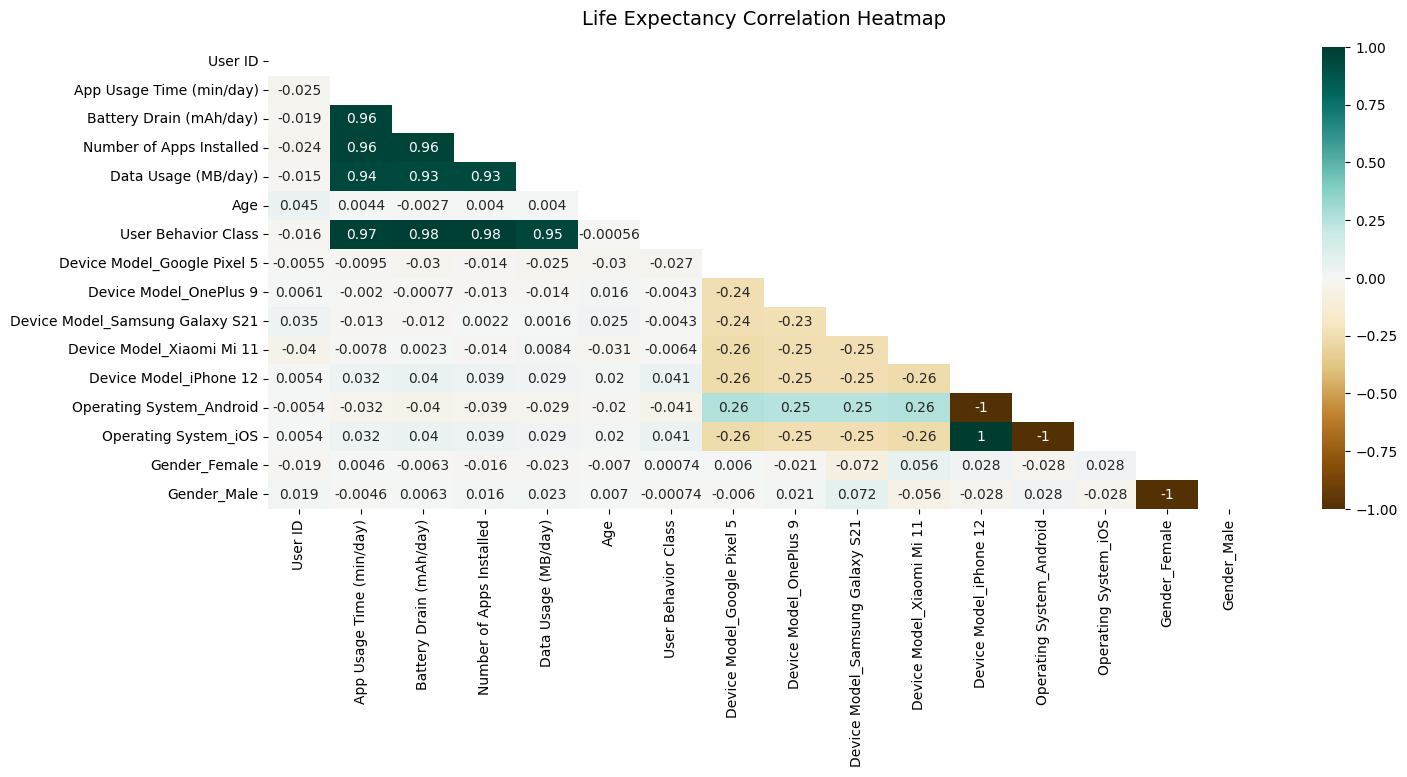

In [11]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Life Expectancy Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
plt.show()

It seems like App usage, number of apps installed, data usage, and user behavior class are all extremely correlated, as well as the operating system and device models, as well as the two gender columns.

In [12]:
df_heat = feature_selection(df)
corr_matrix = df_heat.corr()

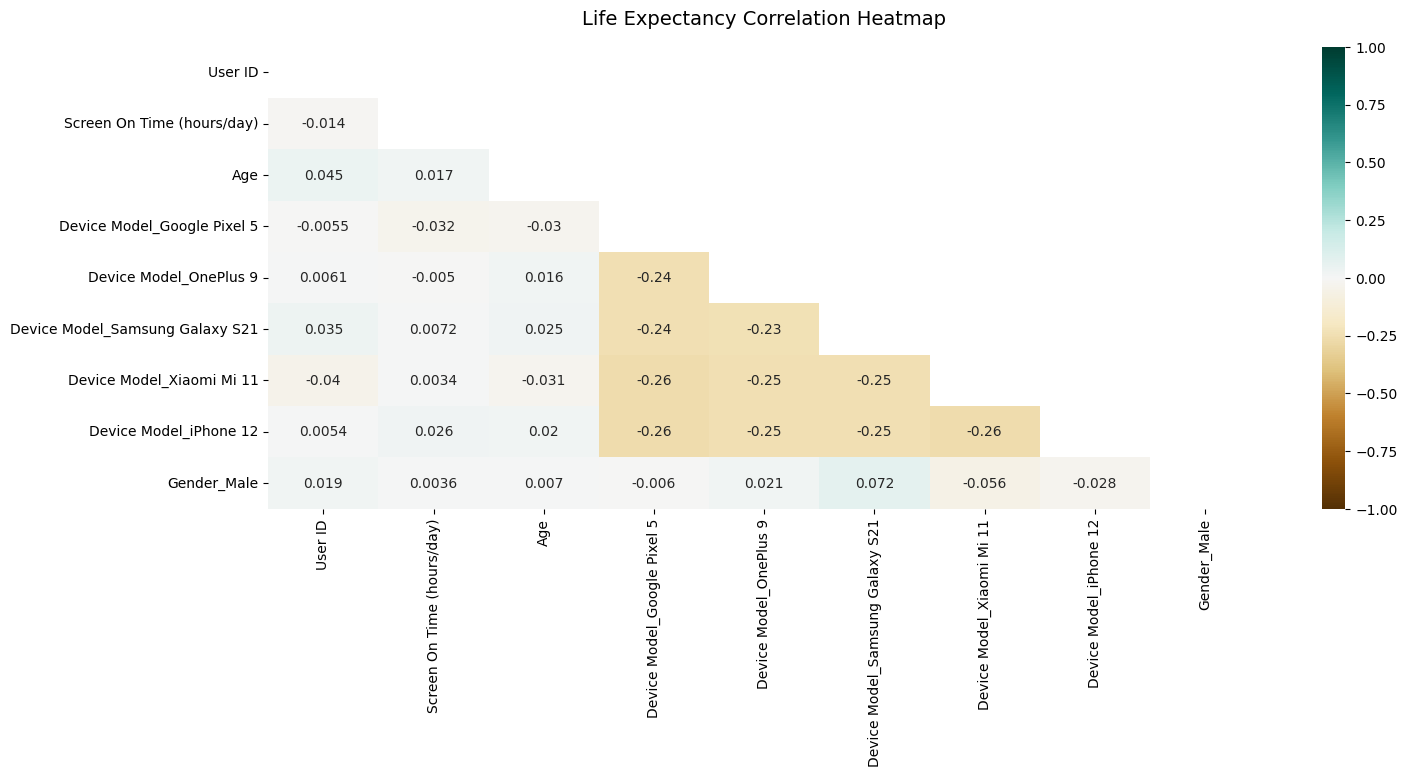

In [13]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Life Expectancy Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
plt.show()

It seems like after removing all the "usage" columns, most of these features aren't correlated with each other anymore.

In [14]:
df2 = pre_process_data(pd.read_csv("data/user_behavior_dataset.csv"), one_hot_encode = True)
df2 = feature_selection(df2)

In [15]:
X_train, X_test, y_train, y_test = get_test_train(df2)
lreg = LinearRegression()
model = lreg.fit(X_train, y_train)

In [16]:
pred = lreg.predict(X_test)
print(f"Train R-squared  = {model.score(X_train, y_train):.3}")
print(f"Test  R-squared  = {model.score(X_test, y_test):.3}")

Train R-squared  = 0.00309
Test  R-squared  = -0.00726


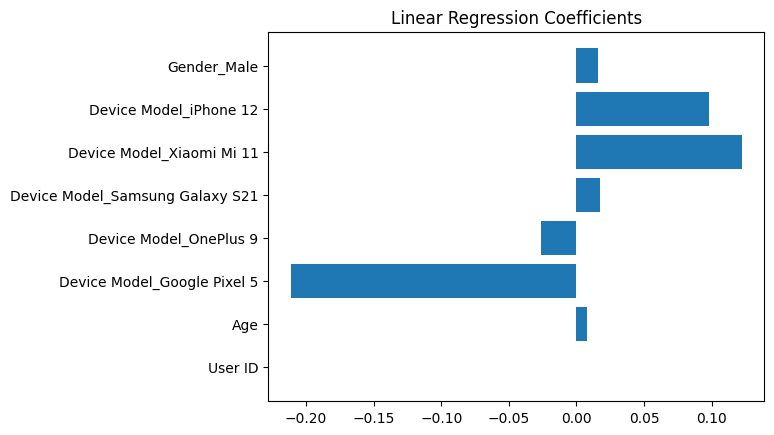

In [17]:
plt.barh(y = df2.drop(target,axis=1).columns, width=model.coef_);
plt.title("Linear Regression Coefficients");

It looks like removing those usage features removed all of the trends in the data, since the model's accuracy is zero now. This might be becuase there wasn't enough data, or because every column was pretty much saying the same thing. Using Lasso regression and feature selection is probably a better strategy than manually removing everything.

In [18]:
def get_test_train(df, test_size = 0.2, random_state = False):
    target = "Screen On Time (hours/day)"    
    X = df.drop(target, axis=1)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    
    y = df[target]
    if random_state:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    return X_train, X_test, y_train, y_test

The mean is: -0.027
The standard deviation is: 0.0169


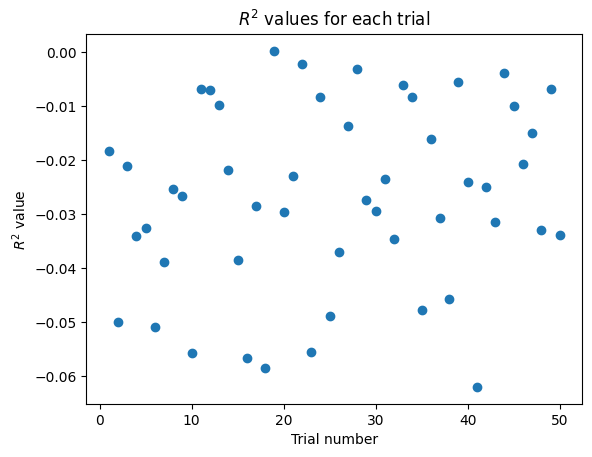

In [19]:
scores = []

for _ in range(50):
    df2 = get_data()
    df2 = pre_process_data(df2, True)
    df2 = feature_selection(df2)
    
    
    X_train, X_test, y_train, y_test = get_test_train(df2)
    lreg = LinearRegression()
    model = lreg.fit(X_train, y_train)
    pred = lreg.predict(X_test)
    scores.append (model.score(X_test, y_test))
mean = np.mean(scores)
stdev = np.std(scores)

xs = np.array(range(len(scores))) + 1
plt.scatter(xs, scores)
plt.title("$R^{2}$ values for each trial")
plt.xlabel("Trial number")
plt.ylabel("$R^2$ value")


print(f"The mean is: {mean:.3f}\nThe standard deviation is: {stdev:.4f}")

Yeah, these features are pretty terrible for predicting screen time. I'll try to figure out which features work best in the original data, with all of the columns still in.

In [20]:
n_alphas = 200
alphas = np.logspace(1,-2, n_alphas)

coefs = []

df = get_data()
df = pre_process_data(df, one_hot_encode = True)
X_train, X_test, y_train, y_test = get_test_train(df)

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

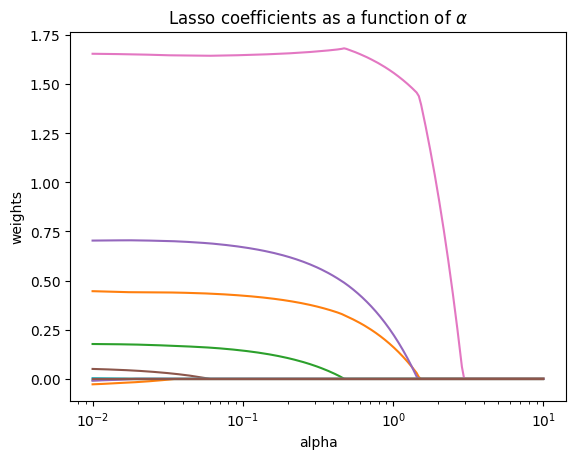

In [21]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of $\\alpha$")
plt.axis("tight")
plt.show()

Just like before, a few of the coefficients seem to be the most important, while the others are almost zero.

Score on test set 0.932


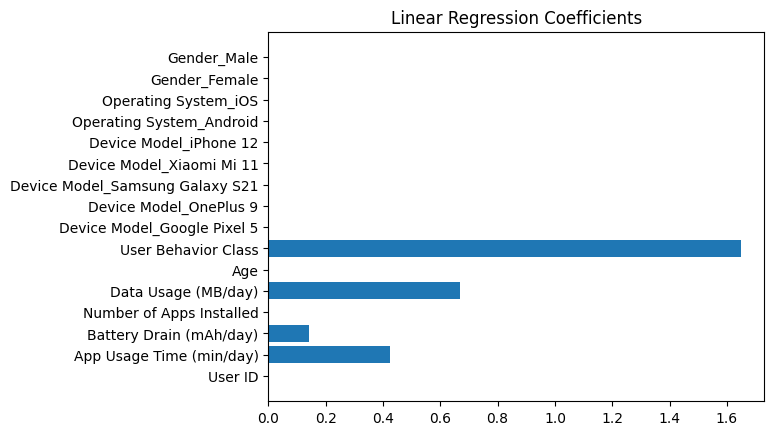

In [22]:
bestalpha = 0.5
alpha = 0.1

lasso = Lasso(alpha=alpha, fit_intercept=True)
lasso.fit(X_train, y_train)

plt.barh(y = df.drop(target,axis=1).columns, width=lasso.coef_);
plt.title("Linear Regression Coefficients");
score = lasso.score(X_test, y_test)
print(f"Score on test set {score:.3}")

94% of the variance in the data is explained by just the user behavior class, data usage, battery drain, and app usage (Those are all basically just the screen time anyway, so this makes sense.)

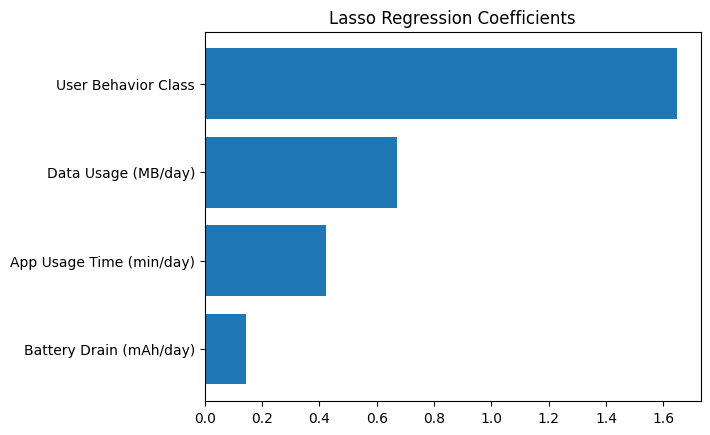

In [23]:
results = pd.DataFrame(np.array([df.drop(target,axis=1).columns, lasso.coef_]).T, columns = ['feature', 'coeff'])

filtered_results = results[abs(results['coeff'])>0].sort_values(by='coeff')

plt.barh(y = 'feature', width='coeff', data = filtered_results);
plt.title("Lasso Regression Coefficients");

Overall, it seems like this dataset might not have been the best to work with, as every column was almost the same thing, and the target column had 3-4 other columns that were really similar. Choosing a different target column might have worked better, but there wasn't many options